# Introduction

Goodreads publishes a list of best books each year and in this analysis, I am going to look at the 'Best Books of 2019'. The link is [here](https://www.goodreads.com/choiceawards/best-books-2019).

There are 20 categories in total and within each category, there are top 20 books, so the final dataset would contain 400 records (400 books). From the link above, we can get the book name, number of votes, and final place in the list. We can also use the book ID/book name and get other relevant details like rating score, number of ratings, number of reviews, page count etc. which are available in the same website.

# Gathering the data - part 1

In part 1, we are collecting the top 20 books per category but we are not collecting details about each book's rating etc. That is happening in part 2.

As a first step, I am defining the libraries we need and using a small function to access/retreive content from a given URL.

In [4]:
#Import libraries
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from bs4 import BeautifulSoup

#Define a function to retrieve and store URLs
#Taken from https://towardsdatascience.com/an-introduction-to-web-scraping-with-python-a2601e8619e5
def getAndParseURL(url):
    result = requests.get(url)
    soup = BeautifulSoup(result.text, 'html.parser')
    return(soup)

Now, we are going to traverse the 'main URL' and obtain the URLs for the 20 'categories'

In [29]:
#Defining the main URL and creating an empty list for the cateogry URLs
mainURL = 'https://www.goodreads.com/choiceawards/best-books-2019'
prefix = 'https://www.goodreads.com' #need to append this
categoriesURL= []

#Traverse the main URL
url = getAndParseURL(mainURL)
for i in range(20): #20 categories
    categoryName = url.findAll("div", {"class": "category clearFix"})[i].find("a").find("h4").get_text()
    #print(categoryName)
    categoryURL = url.findAll("div", {"class": "category clearFix"})[i].find("a")['href']
    #print(prefix + str(categoryURL))
    categoriesURL.append(prefix + str(categoryURL))

20


In [72]:
categoriesURL #looks good

['https://www.goodreads.com/choiceawards/best-fiction-books-2019',
 'https://www.goodreads.com/choiceawards/best-mystery-thriller-books-2019',
 'https://www.goodreads.com/choiceawards/best-historical-fiction-books-2019',
 'https://www.goodreads.com/choiceawards/best-fantasy-books-2019',
 'https://www.goodreads.com/choiceawards/best-romance-books-2019',
 'https://www.goodreads.com/choiceawards/best-science-fiction-books-2019',
 'https://www.goodreads.com/choiceawards/best-horror-books-2019',
 'https://www.goodreads.com/choiceawards/best-humor-books-2019',
 'https://www.goodreads.com/choiceawards/best-nonfiction-books-2019',
 'https://www.goodreads.com/choiceawards/best-memoir-autobiography-books-2019',
 'https://www.goodreads.com/choiceawards/best-history-biography-books-2019',
 'https://www.goodreads.com/choiceawards/best-science-technology-books-2019',
 'https://www.goodreads.com/choiceawards/best-food-cookbooks-2019',
 'https://www.goodreads.com/choiceawards/best-graphic-novels-comic

We now have 20 individual links to traverse (one for each category). Within each category, we will store details about the top 20 books so that we can traverse each book in the next section.

In [85]:
#Loop through all the URLs and find 4 variables per book. The Category variable is common for each section
# For books not in the last spot per row, the DIV CLASS we need is "inlineblock pollAnswer resultShown"
# For books in the last spot per row, we need "inlineblock pollAnswer resultShown pollAnswer--last"

finalList = []

for i in range(20):
    singleCatURL = categoriesURL[i]
    catURL = getAndParseURL(singleCatURL)

    #Book 1
    b1_category = singleCatURL[39:]
    b1_votes = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[0].find("strong").get_text().strip().replace('votes','').strip()
    b1_ID = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[0].find("a")['id'].replace('bookCover_','')
    b1_link = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[0].find("a")['href'].replace('?from_choice=true','')
    b1_title = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[0].find("a").find("img")['title']
    
    #Book 2
    b2_category = singleCatURL[39:]
    b2_votes = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[1].find("strong").get_text().strip().replace('votes','').strip()
    b2_ID = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[1].find("a")['id'].replace('bookCover_','')
    b2_link = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[1].find("a")['href'].replace('?from_choice=true','')
    b2_title = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[1].find("a").find("img")['title']
    
    #Book 3
    b3_category = singleCatURL[39:]
    b3_votes = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[2].find("strong").get_text().strip().replace('votes','').strip()
    b3_ID = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[2].find("a")['id'].replace('bookCover_','')
    b3_link = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[2].find("a")['href'].replace('?from_choice=true','')
    b3_title = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[2].find("a").find("img")['title']
    
    #Book 4
    b4_category = singleCatURL[39:]
    b4_votes = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown pollAnswer--last"})[0].find("strong").get_text().strip().replace('votes','').strip()
    b4_ID = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown pollAnswer--last"})[0].find("a")['id'].replace('bookCover_','')
    b4_link = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown pollAnswer--last"})[0].find("a")['href'].replace('?from_choice=true','')
    b4_title = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown pollAnswer--last"})[0].find("a").find("img")['title']
    
    #Book 5
    b5_category = singleCatURL[39:]
    b5_votes = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[3].find("strong").get_text().strip().replace('votes','').strip()
    b5_ID = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[3].find("a")['id'].replace('bookCover_','')
    b5_link = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[3].find("a")['href'].replace('?from_choice=true','')
    b5_title = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[3].find("a").find("img")['title']
    
    #Book 6
    b6_category = singleCatURL[39:]
    b6_votes = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[4].find("strong").get_text().strip().replace('votes','').strip()
    b6_ID = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[4].find("a")['id'].replace('bookCover_','')
    b6_link = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[4].find("a")['href'].replace('?from_choice=true','')
    b6_title = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[4].find("a").find("img")['title']
    
    #Book 7
    b7_category = singleCatURL[39:]
    b7_votes = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[5].find("strong").get_text().strip().replace('votes','').strip()
    b7_ID = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[5].find("a")['id'].replace('bookCover_','')
    b7_link = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[5].find("a")['href'].replace('?from_choice=true','')
    b7_title = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[5].find("a").find("img")['title']
    
    #Book 8
    b8_category = singleCatURL[39:]
    b8_votes = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown pollAnswer--last"})[1].find("strong").get_text().strip().replace('votes','').strip()
    b8_ID = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown pollAnswer--last"})[1].find("a")['id'].replace('bookCover_','')
    b8_link = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown pollAnswer--last"})[1].find("a")['href'].replace('?from_choice=true','')
    b8_title = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown pollAnswer--last"})[1].find("a").find("img")['title']
    
    #Book 9
    b9_category = singleCatURL[39:]
    b9_votes = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[6].find("strong").get_text().strip().replace('votes','').strip()
    b9_ID = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[6].find("a")['id'].replace('bookCover_','')
    b9_link = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[6].find("a")['href'].replace('?from_choice=true','')
    b9_title = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[6].find("a").find("img")['title']
    
    #Book 10
    b10_category = singleCatURL[39:]
    b10_votes = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[7].find("strong").get_text().strip().replace('votes','').strip()
    b10_ID = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[7].find("a")['id'].replace('bookCover_','')
    b10_link = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[7].find("a")['href'].replace('?from_choice=true','')
    b10_title = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[7].find("a").find("img")['title']
    
    #Book 11
    b11_category = singleCatURL[39:]
    b11_votes = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[8].find("strong").get_text().strip().replace('votes','').strip()
    b11_ID = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[8].find("a")['id'].replace('bookCover_','')
    b11_link = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[8].find("a")['href'].replace('?from_choice=true','')
    b11_title = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[8].find("a").find("img")['title']
    
    #Book 12
    b12_category = singleCatURL[39:]
    b12_votes = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown pollAnswer--last"})[2].find("strong").get_text().strip().replace('votes','').strip()
    b12_ID = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown pollAnswer--last"})[2].find("a")['id'].replace('bookCover_','')
    b12_link = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown pollAnswer--last"})[2].find("a")['href'].replace('?from_choice=true','')
    b12_title = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown pollAnswer--last"})[2].find("a").find("img")['title']
    
    #Book 13
    b13_category = singleCatURL[39:]
    b13_votes = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[9].find("strong").get_text().strip().replace('votes','').strip()
    b13_ID = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[9].find("a")['id'].replace('bookCover_','')
    b13_link = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[9].find("a")['href'].replace('?from_choice=true','')
    b13_title = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[9].find("a").find("img")['title']
    
    #Book 14
    b14_category = singleCatURL[39:]
    b14_votes = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[10].find("strong").get_text().strip().replace('votes','').strip()
    b14_ID = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[10].find("a")['id'].replace('bookCover_','')
    b14_link = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[10].find("a")['href'].replace('?from_choice=true','')
    b14_title = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[10].find("a").find("img")['title']
    
    #Book 15
    b15_category = singleCatURL[39:]
    b15_votes = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[11].find("strong").get_text().strip().replace('votes','').strip()
    b15_ID = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[11].find("a")['id'].replace('bookCover_','')
    b15_link = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[11].find("a")['href'].replace('?from_choice=true','')
    b15_title = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[11].find("a").find("img")['title']
    
    #Book 16
    b16_category = singleCatURL[39:]
    b16_votes = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown pollAnswer--last"})[3].find("strong").get_text().strip().replace('votes','').strip()
    b16_ID = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown pollAnswer--last"})[3].find("a")['id'].replace('bookCover_','')
    b16_link = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown pollAnswer--last"})[3].find("a")['href'].replace('?from_choice=true','')
    b16_title = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown pollAnswer--last"})[3].find("a").find("img")['title']
    
    #Book 17
    b17_category = singleCatURL[39:]
    b17_votes = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[12].find("strong").get_text().strip().replace('votes','').strip()
    b17_ID = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[12].find("a")['id'].replace('bookCover_','')
    b17_link = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[12].find("a")['href'].replace('?from_choice=true','')
    b17_title = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[12].find("a").find("img")['title']
    
    #Book 18
    b18_category = singleCatURL[39:]
    b18_votes = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[13].find("strong").get_text().strip().replace('votes','').strip()
    b18_ID = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[13].find("a")['id'].replace('bookCover_','')
    b18_link = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[13].find("a")['href'].replace('?from_choice=true','')
    b18_title = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[13].find("a").find("img")['title']
    
    #Book 19
    b19_category = singleCatURL[39:]
    b19_votes = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[14].find("strong").get_text().strip().replace('votes','').strip()
    b19_ID = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[14].find("a")['id'].replace('bookCover_','')
    b19_link = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[14].find("a")['href'].replace('?from_choice=true','')
    b19_title = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown"})[14].find("a").find("img")['title']
    
    #Book 20
    b20_category = singleCatURL[39:]
    b20_votes = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown pollAnswer--last"})[4].find("strong").get_text().strip().replace('votes','').strip()
    b20_ID = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown pollAnswer--last"})[4].find("a")['id'].replace('bookCover_','')
    b20_link = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown pollAnswer--last"})[4].find("a")['href'].replace('?from_choice=true','')
    b20_title = catURL.findAll("div", {"class": "inlineblock pollAnswer resultShown pollAnswer--last"})[4].find("a").find("img")['title']
    
    #Create list of dictionaries
    finalList.append({'b1_category': b1_category,
                      'b1_votes': b1_votes,
                      'b1_ID': b1_ID,
                      'b1_link': b1_link,
                      'b1_title': b1_title,
                      'b2_category': b2_category,
                      'b2_votes': b2_votes,
                      'b2_ID': b2_ID,
                      'b2_link': b2_link,
                      'b2_title': b2_title,
                      'b3_category': b3_category,
                      'b3_votes': b3_votes,
                      'b3_ID': b3_ID,
                      'b3_link': b3_link,
                      'b3_title': b3_title,
                      'b4_category': b4_category,
                      'b4_votes': b4_votes,
                      'b4_ID': b4_ID,
                      'b4_link': b4_link,
                      'b4_title': b4_title,
                      'b5_category': b5_category,
                      'b5_votes': b5_votes,
                      'b5_ID': b5_ID,
                      'b5_link': b5_link,
                      'b5_title': b5_title,
                      'b6_category': b6_category,
                      'b6_votes': b6_votes,
                      'b6_ID': b6_ID,
                      'b6_link': b6_link,
                      'b6_title': b6_title,
                      'b7_category': b7_category,
                      'b7_votes': b7_votes,
                      'b7_ID': b7_ID,
                      'b7_link': b7_link,
                      'b7_title': b7_title,
                      'b8_category': b8_category,
                      'b8_votes': b8_votes,
                      'b8_ID': b8_ID,
                      'b8_link': b8_link,
                      'b8_title': b8_title,
                      'b9_category': b9_category,
                      'b9_votes': b9_votes,
                      'b9_ID': b9_ID,
                      'b9_link': b9_link,
                      'b9_title': b9_title,
                      'b10_category': b10_category,
                      'b10_votes': b10_votes,
                      'b10_ID': b10_ID,
                      'b10_link': b10_link,
                      'b10_title': b10_title,
                      'b11_category': b11_category,
                      'b11_votes': b11_votes,
                      'b11_ID': b11_ID,
                      'b11_link': b11_link,
                      'b11_title': b11_title,
                      'b12_category': b12_category,
                      'b12_votes': b12_votes,
                      'b12_ID': b12_ID,
                      'b12_link': b12_link,
                      'b12_title': b12_title,
                      'b13_category': b13_category,
                      'b13_votes': b13_votes,
                      'b13_ID': b13_ID,
                      'b13_link': b13_link,
                      'b13_title': b13_title,
                      'b14_category': b14_category,
                      'b14_votes': b14_votes,
                      'b14_ID': b14_ID,
                      'b14_link': b14_link,
                      'b14_title': b14_title,
                      'b15_category': b15_category,
                      'b15_votes': b15_votes,
                      'b15_ID': b15_ID,
                      'b15_link': b15_link,
                      'b15_title': b15_title,
                      'b16_category': b16_category,
                      'b16_votes': b16_votes,
                      'b16_ID': b16_ID,
                      'b16_link': b16_link,
                      'b16_title': b16_title,
                      'b17_category': b17_category,
                      'b17_votes': b17_votes,
                      'b17_ID': b17_ID,
                      'b17_link': b17_link,
                      'b17_title': b17_title,
                      'b18_category': b18_category,
                      'b18_votes': b18_votes,
                      'b18_ID': b18_ID,
                      'b18_link': b18_link,
                      'b18_title': b18_title,
                      'b19_category': b19_category,
                      'b19_votes': b19_votes,
                      'b19_ID': b19_ID,
                      'b19_link': b19_link,
                      'b19_title': b19_title,
                      'b20_category': b20_category,
                      'b20_votes': b20_votes,
                      'b20_ID': b20_ID,
                      'b20_link': b20_link,
                      'b20_title': b20_title})

In [87]:
#Manual validation and spot checks - looks goodm
finalList[5]

{'b1_category': 'best-science-fiction-books-2019',
 'b1_votes': '41,261',
 'b1_ID': '42046112',
 'b1_link': '/book/show/42046112-recursion',
 'b1_title': 'Recursion by Blake Crouch',
 'b2_category': 'best-science-fiction-books-2019',
 'b2_votes': '35,556',
 'b2_ID': '37678631',
 'b2_link': '/book/show/37678631-dark-age',
 'b2_title': 'Dark Age by Pierce Brown',
 'b3_category': 'best-science-fiction-books-2019',
 'b3_votes': '23,273',
 'b3_ID': '42036538',
 'b3_link': '/book/show/42036538-gideon-the-ninth',
 'b3_title': 'Gideon the Ninth by Tamsyn Muir',
 'b4_category': 'best-science-fiction-books-2019',
 'b4_votes': '20,344',
 'b4_ID': '41093489',
 'b4_link': '/book/show/41093489-this-is-how-you-lose-the-time-war',
 'b4_title': 'This Is How You Lose the Time War by Amal El-Mohtar',
 'b5_category': 'best-science-fiction-books-2019',
 'b5_votes': '18,350',
 'b5_ID': '42201962',
 'b5_link': '/book/show/42201962-the-deep',
 'b5_title': 'The Deep by Rivers Solomon',
 'b6_category': 'best-sc

Creating 20 individual dataframes and concatenating into 1. 400 records in total

In [88]:
#Creating individual dataframes, 20 in total
b1 = pd.DataFrame(finalList, columns = ['b1_category',
                                        'b1_votes',
                                        'b1_ID',
                                        'b1_link',
                                        'b1_title'])

b2 = pd.DataFrame(finalList, columns = ['b2_category',
                                        'b2_votes',
                                        'b2_ID',
                                        'b2_link',
                                        'b2_title'])

b3 = pd.DataFrame(finalList, columns = ['b3_category',
                                        'b3_votes',
                                        'b3_ID',
                                        'b3_link',
                                        'b3_title'])

b4 = pd.DataFrame(finalList, columns = ['b4_category',
                                        'b4_votes',
                                        'b4_ID',
                                        'b4_link',
                                        'b4_title'])

b5 = pd.DataFrame(finalList, columns = ['b5_category',
                                        'b5_votes',
                                        'b5_ID',
                                        'b5_link',
                                        'b5_title'])

b6 = pd.DataFrame(finalList, columns = ['b6_category',
                                        'b6_votes',
                                        'b6_ID',
                                        'b6_link',
                                        'b6_title'])

b7 = pd.DataFrame(finalList, columns = ['b7_category',
                                        'b7_votes',
                                        'b7_ID',
                                        'b7_link',
                                        'b7_title'])

b8 = pd.DataFrame(finalList, columns = ['b8_category',
                                        'b8_votes',
                                        'b8_ID',
                                        'b8_link',
                                        'b8_title'])

b9 = pd.DataFrame(finalList, columns = ['b9_category',
                                        'b9_votes',
                                        'b9_ID',
                                        'b9_link',
                                        'b9_title'])

b10 = pd.DataFrame(finalList, columns = ['b10_category',
                                         'b10_votes',
                                         'b10_ID',
                                         'b10_link',
                                         'b10_title'])

b11 = pd.DataFrame(finalList, columns = ['b11_category',
                                         'b11_votes',
                                         'b11_ID',
                                         'b11_link',
                                         'b11_title'])

b12 = pd.DataFrame(finalList, columns = ['b12_category',
                                         'b12_votes',
                                         'b12_ID',
                                         'b12_link',
                                         'b12_title'])

b13 = pd.DataFrame(finalList, columns = ['b13_category',
                                         'b13_votes',
                                         'b13_ID',
                                         'b13_link',
                                         'b13_title'])

b14 = pd.DataFrame(finalList, columns = ['b14_category',
                                         'b14_votes',
                                         'b14_ID',
                                         'b14_link',
                                         'b14_title'])

b15 = pd.DataFrame(finalList, columns = ['b15_category',
                                         'b15_votes',
                                         'b15_ID',
                                         'b15_link',
                                         'b15_title'])

b16 = pd.DataFrame(finalList, columns = ['b16_category',
                                         'b16_votes',
                                         'b16_ID',
                                         'b16_link',
                                         'b16_title'])

b17 = pd.DataFrame(finalList, columns = ['b17_category',
                                         'b17_votes',
                                         'b17_ID',
                                         'b17_link',
                                         'b17_title'])

b18 = pd.DataFrame(finalList, columns = ['b18_category',
                                         'b18_votes',
                                         'b18_ID',
                                         'b18_link',
                                         'b18_title'])

b19 = pd.DataFrame(finalList, columns = ['b19_category',
                                         'b19_votes',
                                         'b19_ID',
                                         'b19_link',
                                         'b19_title'])

b20 = pd.DataFrame(finalList, columns = ['b20_category',
                                         'b20_votes',
                                         'b20_ID',
                                         'b20_link',
                                         'b20_title'])

#Concatenating them together
df = pd.DataFrame(np.concatenate((b1.values, b2.values, b3.values, b4.values, b5.values, b6.values, b7.values, b8.values, b9.values, b10.values, b11.values, b12.values, b13.values, b14.values, b15.values, b16.values, b17.values, b18.values, b19.values, b20.values), axis=0))
df.columns = ['Category',
              'NumberOfVotes',
              'BookID',
              'Hyperlink',
              'Title']

In [89]:
df

,Category,NumberOfVotes,BookID,Hyperlink,Title
0,best-fiction-books-2019,"98,291",42975172,/book/show/42975172-the-testaments,The Testaments by Margaret Atwood
1,best-mystery-thriller-books-2019,"68,821",40097951,/book/show/40097951-the-silent-patient,The Silent Patient by Alex Michaelides
2,best-historical-fiction-books-2019,"82,483",40597810,/book/show/40597810-daisy-jones-the-six,Daisy Jones & The Six by Taylor Jenkins Reid
3,best-fantasy-books-2019,"53,430",43263680,/book/show/43263680-ninth-house,Ninth House by Leigh Bardugo
4,best-romance-books-2019,"76,688",52410331,/book/show/52410331-red-white-royal-blue,"Red, White & Royal Blue by Casey McQuiston"
...,...,...,...,...,...
395,best-debut-novel-2019,"2,525",41880602,/book/show/41880602-fleishman-is-in-trouble,Fleishman Is in Trouble by Taffy Brodesser-Akner
396,best-young-adult-fiction-books-2019,"1,264",39863399,/book/show/39863399-birthday,Birthday by Meredith Russo
397,best-young-adult-fantasy-books-2019,"1,859",39863498,/book/show/39863498-the-gilded-wolves,The Gilded Wolves by Roshani Chokshi
398,best-childrens-books-2019,"1,295",39884337,/book/show/39884337-tristan-strong-punches-a-h...,Tristan Strong Punches a Hole in the Sky by Kw...


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
Category         400 non-null object
NumberOfVotes    400 non-null object
BookID           400 non-null object
Hyperlink        400 non-null object
Title            400 non-null object
dtypes: object(5)
memory usage: 15.8+ KB


In [92]:
df['Category'].value_counts()

best-horror-books-2019                  20
best-history-biography-books-2019       20
best-picture-books-2019                 20
best-poetry-books-2019                  20
best-graphic-novels-comics-2019         20
best-memoir-autobiography-books-2019    20
best-romance-books-2019                 20
best-science-technology-books-2019      20
best-young-adult-fantasy-books-2019     20
best-childrens-books-2019               20
best-fantasy-books-2019                 20
best-science-fiction-books-2019         20
best-debut-novel-2019                   20
best-mystery-thriller-books-2019        20
best-historical-fiction-books-2019      20
best-fiction-books-2019                 20
best-humor-books-2019                   20
best-nonfiction-books-2019              20
best-young-adult-fiction-books-2019     20
best-food-cookbooks-2019                20
Name: Category, dtype: int64

# Cleaning the data - part 1

Few things to clean

1. convert number of votes to integer
2. add the prefix to hyperlink
3. clean category column to be more concise

In [94]:
#1 convert votes to integers
df['NumberOfVotes'] = df.NumberOfVotes.str.replace(',','').astype(int)

In [98]:
#2 add prefix 'https://www.goodreads.com' to hyperlink
df['Hyperlink'] = 'https://www.goodreads.com' + df.Hyperlink.astype(str)

In [112]:
#3 clean category column to be more concise
df['Category'] = df.Category.str.replace('best-','').str.replace('-2019','')
df['Category'] = df.Category.str.replace('-books','')
df['Category'] = df.Category.str.replace('-',' ')

In [113]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.set_option('display.max_colwidth', -1)

#Check all 3 changes
#df.head()
#df.info()
#df['Hyperlink']
df['Category'].value_counts()

poetry                   20
history biography        20
young adult fiction      20
mystery thriller         20
young adult fantasy      20
historical fiction       20
memoir autobiography     20
science technology       20
science fiction          20
graphic novels comics    20
debut novel              20
nonfiction               20
childrens                20
humor                    20
food cookbooks           20
fiction                  20
picture                  20
fantasy                  20
romance                  20
horror                   20
Name: Category, dtype: int64

# Gathering the data - part 2

For each of the 400 books, collect additional variables like page count, rating, number of reviews etc.

In [129]:
#Create list of URLs to traverse 
books = df['Hyperlink'].tolist().copy()
print(type(books))
print(len(books))

<class 'list'>
400


In [241]:
#Get rating, rating count, and review count
additionalData = []

for i in range(400):
    bookURL = books[i]
    bookURLparsed = getAndParseURL(bookURL)
    bookURLraw = bookURL 
    rating = bookURLparsed.findAll("div", {"class": "uitext stacked"})[0].find("span",{"itemprop": "ratingValue"}).text.strip()
    ratingCnt = bookURLparsed.findAll("div", {"class": "uitext stacked"})[0].findAll("a")[1].find("meta")['content']
    reviewCnt = bookURLparsed.findAll("div", {"class": "uitext stacked"})[0].findAll("a")[2].find("meta")['content']
    
    additionalData.append({'Link': bookURLraw,
                           'Rating': rating,
                           'RatingCount': ratingCnt,
                           'ReviewCount': reviewCnt})

In [242]:
#check length
print(len(additionalData))
additionalData[0]

400


{'Link': 'https://www.goodreads.com/book/show/42975172-the-testaments',
 'Rating': '4.21',
 'RatingCount': '167861',
 'ReviewCount': '18041'}

In [243]:
#check manually
print(books[0])
print(books[40])
print(books[78])
print(books[245])
print(books[299])
print(books[311])
print(books[399])

print(additionalData[0])
print(additionalData[40])
print(additionalData[78])
print(additionalData[245])
print(additionalData[299])
print(additionalData[311])
print(additionalData[399])

https://www.goodreads.com/book/show/42975172-the-testaments
https://www.goodreads.com/book/show/40545956-where-the-forest-meets-the-stars
https://www.goodreads.com/book/show/39280558-the-remarkable-journey-of-coyote-sunrise
https://www.goodreads.com/book/show/34019083-wanderers
https://www.goodreads.com/book/show/42642044-fry-bread
https://www.goodreads.com/book/show/43723901-lifespan
https://www.goodreads.com/book/show/43662690-snow-globe-wishes
{'Link': 'https://www.goodreads.com/book/show/42975172-the-testaments', 'Rating': '4.21', 'RatingCount': '167861', 'ReviewCount': '18041'}
{'Link': 'https://www.goodreads.com/book/show/40545956-where-the-forest-meets-the-stars', 'Rating': '4.15', 'RatingCount': '79078', 'ReviewCount': '7151'}
{'Link': 'https://www.goodreads.com/book/show/39280558-the-remarkable-journey-of-coyote-sunrise', 'Rating': '4.49', 'RatingCount': '7628', 'ReviewCount': '1695'}
{'Link': 'https://www.goodreads.com/book/show/34019083-wanderers', 'Rating': '4.01', 'RatingC

In [244]:
#Convert into dataframe
additionalDf = pd.DataFrame(additionalData, columns = ['Link',
                                                       'Rating',
                                                       'RatingCount',
                                                       'ReviewCount'])

In [245]:
#Check
additionalDf.head()
additionalDf.info()
additionalDf.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
Link           400 non-null object
Rating         400 non-null object
RatingCount    400 non-null object
ReviewCount    400 non-null object
dtypes: object(4)
memory usage: 12.6+ KB


Index(['Link', 'Rating', 'RatingCount', 'ReviewCount'], dtype='object')

# Cleaning the data - part 2

In the additional dataset, we need to convert the rating, rating count, and review count into proper datatypes.

In [211]:
additionalDf

,Link,Rating,RatingCount,ReviewCount
0,https://www.goodreads.com/book/show/42975172-the-testaments,4.21,167530,18016
1,https://www.goodreads.com/book/show/40097951-the-silent-patient,4.09,364749,38985
2,https://www.goodreads.com/book/show/40597810-daisy-jones-the-six,4.21,211050,32170
3,https://www.goodreads.com/book/show/43263680-ninth-house,4.08,63231,11868
4,https://www.goodreads.com/book/show/52410331-red-white-royal-blue,4.26,114780,22442
5,https://www.goodreads.com/book/show/42046112-recursion,4.18,81407,11961
6,https://www.goodreads.com/book/show/43798285-the-institute,4.21,99209,11855
7,https://www.goodreads.com/book/show/44600621-dear-girls,3.92,36548,3931
8,https://www.goodreads.com/book/show/40591267-girl-stop-apologizing,3.95,45698,4463
9,https://www.goodreads.com/book/show/43386674-over-the-top,4.22,30165,3275


In [246]:
additionalDf['Rating'] = additionalDf.Rating.astype(float)
additionalDf['RatingCount'] = additionalDf.RatingCount.astype(int)
additionalDf['ReviewCount'] = additionalDf.ReviewCount.astype(int)

In [247]:
additionalDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
Link           400 non-null object
Rating         400 non-null float64
RatingCount    400 non-null int64
ReviewCount    400 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 12.6+ KB


# Merging two datasets together

In [232]:
#First dataset
print(len(df))
#Second dataset
print(len(additionalDf))

400
400


In [248]:
#Joining them together
fullDf = pd.merge(df,additionalDf,left_on='Hyperlink',right_on='Link')
fullDf.drop(['Link'],axis=1,inplace=True)

In [249]:
fullDf.head()
fullDf.info()
#Looks like there are duplicates for some reason (400 to 430). Checking them below.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 0 to 429
Data columns (total 8 columns):
Category         430 non-null object
NumberOfVotes    430 non-null int64
BookID           430 non-null object
Hyperlink        430 non-null object
Title            430 non-null object
Rating           430 non-null float64
RatingCount      430 non-null int64
ReviewCount      430 non-null int64
dtypes: float64(1), int64(3), object(4)
memory usage: 30.2+ KB


In [234]:
fullDf[fullDf.duplicated('BookID')] # so some books appear in multiple categories which is fine

,Category,NumberOfVotes,BookID,Hyperlink,Title,Rating,RatingCount,ReviewCount
2,mystery thriller,68821,40097951,https://www.goodreads.com/book/show/40097951-the-silent-patient,The Silent Patient by Alex Michaelides,4.09,364749,38985
3,debut novel,44936,40097951,https://www.goodreads.com/book/show/40097951-the-silent-patient,The Silent Patient by Alex Michaelides,4.09,364749,38985
4,debut novel,44936,40097951,https://www.goodreads.com/book/show/40097951-the-silent-patient,The Silent Patient by Alex Michaelides,4.09,364749,38985
25,mystery thriller,52097,38819868,https://www.goodreads.com/book/show/38819868-my-sister-the-serial-killer,"My Sister, the Serial Killer by Oyinkan Braithwaite",3.74,110467,13483
26,debut novel,26662,38819868,https://www.goodreads.com/book/show/38819868-my-sister-the-serial-killer,"My Sister, the Serial Killer by Oyinkan Braithwaite",3.74,110467,13483
27,debut novel,26662,38819868,https://www.goodreads.com/book/show/38819868-my-sister-the-serial-killer,"My Sister, the Serial Killer by Oyinkan Braithwaite",3.74,110467,13483
51,science fiction,23273,42036538,https://www.goodreads.com/book/show/42036538-gideon-the-ninth,Gideon the Ninth by Tamsyn Muir,4.24,17652,4098
52,debut novel,3145,42036538,https://www.goodreads.com/book/show/42036538-gideon-the-ninth,Gideon the Ninth by Tamsyn Muir,4.24,17652,4098
53,debut novel,3145,42036538,https://www.goodreads.com/book/show/42036538-gideon-the-ninth,Gideon the Ninth by Tamsyn Muir,4.24,17652,4098
83,debut novel,18657,43521657,https://www.goodreads.com/book/show/43521657-the-ten-thousand-doors-of-january,The Ten Thousand Doors of January by Alix E. Harrow,4.11,29025,6009


Checking one example of a book coming in multiple categories.

In [250]:
df[df['Hyperlink'] == "https://www.goodreads.com/book/show/34313931-a-woman-is-no-man"]

,Category,NumberOfVotes,BookID,Hyperlink,Title
120,fiction,20211,34313931,https://www.goodreads.com/book/show/34313931-a-woman-is-no-man,A Woman Is No Man by Etaf Rum
155,debut novel,12315,34313931,https://www.goodreads.com/book/show/34313931-a-woman-is-no-man,A Woman Is No Man by Etaf Rum


In [251]:
additionalDf[additionalDf['Link'] == "https://www.goodreads.com/book/show/34313931-a-woman-is-no-man"]

,Link,Rating,RatingCount,ReviewCount
120,https://www.goodreads.com/book/show/34313931-a-woman-is-no-man,4.24,52679,6470
155,https://www.goodreads.com/book/show/34313931-a-woman-is-no-man,4.24,52679,6470


In [252]:
fullDf[fullDf['Hyperlink'] == "https://www.goodreads.com/book/show/34313931-a-woman-is-no-man"]

,Category,NumberOfVotes,BookID,Hyperlink,Title,Rating,RatingCount,ReviewCount
138,fiction,20211,34313931,https://www.goodreads.com/book/show/34313931-a-woman-is-no-man,A Woman Is No Man by Etaf Rum,4.24,52679,6470
139,fiction,20211,34313931,https://www.goodreads.com/book/show/34313931-a-woman-is-no-man,A Woman Is No Man by Etaf Rum,4.24,52679,6470
140,debut novel,12315,34313931,https://www.goodreads.com/book/show/34313931-a-woman-is-no-man,A Woman Is No Man by Etaf Rum,4.24,52679,6470
141,debut novel,12315,34313931,https://www.goodreads.com/book/show/34313931-a-woman-is-no-man,A Woman Is No Man by Etaf Rum,4.24,52679,6470


These are just record level duplicates and can be easily removed

In [253]:
fullDf.drop_duplicates(inplace=True)

In [271]:
fullDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 429
Data columns (total 8 columns):
Category         400 non-null object
NumberOfVotes    400 non-null int64
BookID           400 non-null object
Hyperlink        400 non-null object
Title            400 non-null object
Rating           400 non-null float64
RatingCount      400 non-null int64
ReviewCount      400 non-null int64
dtypes: float64(1), int64(3), object(4)
memory usage: 28.1+ KB


In [255]:
#Saving a copy of the final dataset
fullDf.to_csv('goodreads_final_clean_dataset.csv')

## Some manual spot checks

In [256]:
fullDf.head()

,Category,NumberOfVotes,BookID,Hyperlink,Title,Rating,RatingCount,ReviewCount
0,fiction,98291,42975172,https://www.goodreads.com/book/show/42975172-the-testaments,The Testaments by Margaret Atwood,4.21,167861,18041
1,mystery thriller,68821,40097951,https://www.goodreads.com/book/show/40097951-the-silent-patient,The Silent Patient by Alex Michaelides,4.09,365819,39076
3,debut novel,44936,40097951,https://www.goodreads.com/book/show/40097951-the-silent-patient,The Silent Patient by Alex Michaelides,4.09,365819,39076
5,historical fiction,82483,40597810,https://www.goodreads.com/book/show/40597810-daisy-jones-the-six,Daisy Jones & The Six by Taylor Jenkins Reid,4.21,211493,32219
6,fantasy,53430,43263680,https://www.goodreads.com/book/show/43263680-ninth-house,Ninth House by Leigh Bardugo,4.08,63377,11891


In [257]:
fullDf['Category'].value_counts()

poetry                   20
history biography        20
young adult fiction      20
mystery thriller         20
young adult fantasy      20
historical fiction       20
memoir autobiography     20
science technology       20
science fiction          20
graphic novels comics    20
debut novel              20
nonfiction               20
childrens                20
humor                    20
food cookbooks           20
fiction                  20
picture                  20
fantasy                  20
romance                  20
horror                   20
Name: Category, dtype: int64

In [262]:
print(min(fullDf['Rating']))
print(max(fullDf['Rating']))
fullDf[fullDf['Rating'] == 4.9]

3.18
4.9


,Category,NumberOfVotes,BookID,Hyperlink,Title,Rating,RatingCount,ReviewCount
38,food cookbooks,21108,43884186,https://www.goodreads.com/book/show/43884186-the-adventurous-eaters-club,The Adventurous Eaters Club by Misha Collins,4.9,1898,97


In [263]:
print(min(fullDf['RatingCount']))
print(max(fullDf['RatingCount']))
print(min(fullDf['ReviewCount']))
print(max(fullDf['ReviewCount']))

75
365819
22
39076


In [272]:
x = fullDf.groupby('Category')['Rating','RatingCount','ReviewCount'].mean().reset_index()
x.sort_values('Rating', ascending=False)
x.sort_values('RatingCount', ascending=False)
x.sort_values('ReviewCount', ascending=False)

,Category,Rating,RatingCount,ReviewCount
1,debut novel,4.0015,58669.35,8061.80
11,mystery thriller,3.9765,62375.65,7638.15
6,historical fiction,4.1125,60530.85,7548.25
3,fiction,3.9670,56720.20,6395.95
15,romance,4.0695,37252.05,5941.55
18,young adult fantasy,4.1250,29595.15,5466.10
2,fantasy,4.1645,22563.80,3859.85
19,young adult fiction,4.0610,19721.60,3570.60
12,nonfiction,4.1780,27929.15,3111.70
16,science fiction,4.0035,15650.85,2448.75


# Analyzing the data

Before we start analyzing the data, we need to score each book within its category from 1 to 20.

In [291]:
fullDf['Position'] = fullDf.groupby('Category')['NumberOfVotes'].rank(method='min',ascending=False)

In [308]:
fullDf[fullDf['Category'] == "graphic novels comics"] #looks right; checked a couple of other categories as well.m

,Category,NumberOfVotes,BookID,Hyperlink,Title,Rating,RatingCount,ReviewCount,Position
16,graphic novels comics,29624,40864790,https://www.goodreads.com/book/show/40864790-pumpkinheads,Pumpkinheads by Rainbow Rowell,4.12,31673,6759,1
39,graphic novels comics,28460,43307358,https://www.goodreads.com/book/show/43307358-heartstopper,Heartstopper by Alice Oseman,4.65,21857,3750,2
61,graphic novels comics,23606,40766383,https://www.goodreads.com/book/show/40766383-the-handmaid-s-tale,The Handmaid's Tale by Renée Nault,4.24,9478,1249,3
80,graphic novels comics,19574,42527866,https://www.goodreads.com/book/show/42527866-they-called-us-enemy,They Called Us Enemy by George Takei,4.47,12567,2264,4
106,graphic novels comics,18200,39296114,https://www.goodreads.com/book/show/39296114-book-love,Book Love by Debbie Tung,4.25,9479,2243,5
131,graphic novels comics,17730,38452813,https://www.goodreads.com/book/show/38452813-teen-titans,Teen Titans by Kami Garcia,3.97,8056,1546,6
154,graphic novels comics,16832,38524301,https://www.goodreads.com/book/show/38524301-shades-of-magic-vol-1,Shades of Magic Vol. 1 by V.E. Schwab,3.70,7453,708,7
173,graphic novels comics,14237,21801668,https://www.goodreads.com/book/show/21801668-the-umbrella-academy-vol-3,"The Umbrella Academy, Vol. 3 by Gerard Way",3.66,3465,431,8
195,graphic novels comics,9005,44774415,https://www.goodreads.com/book/show/44774415-mooncakes,Mooncakes by Suzanne Walker,3.88,6638,2189,9
218,graphic novels comics,8516,38812893,https://www.goodreads.com/book/show/38812893-paper-girls-vol-5,"Paper Girls, Vol. 5 by Brian K. Vaughan",4.22,7347,724,10


There, now this data set is complete! (Converted position to INT)

## Questions to answer

We can answer quite a few things with this dataset but the things on my mind are the below. Before jumping into them, we will do a few univariate analyses on the key variables.

1. How does the number of votes vary by category? And, for the top book in each category, how does the number of votes look?
2. What is the average rating of the top 20 books within each category? Which category is more popular than others? 
3. The position of the books within each category are determined by number of votes. However, does the general rating also align with how the books are ranked?
4. Does rating count/review count affect general rating?

## Univariate analyses

Histogram of number of votes

Most books have less than 20 K votes but there are books with extreme number of votes. Which are they?

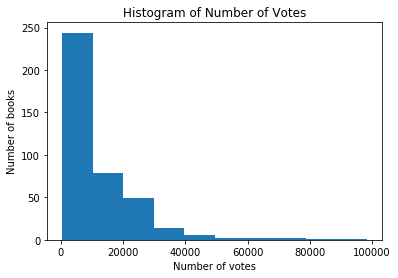

In [332]:
plt.hist(fullDf['NumberOfVotes']);
plt.xlabel('Number of votes');
plt.ylabel('Number of books');
plt.title('Histogram of Number of Votes');

In [327]:
fullDf[fullDf['NumberOfVotes'] > 40000] #24 books

,Category,NumberOfVotes,BookID,Hyperlink,Title,Rating,RatingCount,ReviewCount,Position
0,fiction,98291,42975172,https://www.goodreads.com/book/show/42975172-the-testaments,The Testaments by Margaret Atwood,4.21,167861,18041,1
1,mystery thriller,68821,40097951,https://www.goodreads.com/book/show/40097951-the-silent-patient,The Silent Patient by Alex Michaelides,4.09,365819,39076,1
3,debut novel,44936,40097951,https://www.goodreads.com/book/show/40097951-the-silent-patient,The Silent Patient by Alex Michaelides,4.09,365819,39076,2
5,historical fiction,82483,40597810,https://www.goodreads.com/book/show/40597810-daisy-jones-the-six,Daisy Jones & The Six by Taylor Jenkins Reid,4.21,211493,32219,1
6,fantasy,53430,43263680,https://www.goodreads.com/book/show/43263680-ninth-house,Ninth House by Leigh Bardugo,4.08,63377,11891,1
7,romance,76688,52410331,https://www.goodreads.com/book/show/52410331-red-white-royal-blue,"Red, White & Royal Blue by Casey McQuiston",4.26,115048,22473,1
8,science fiction,41261,42046112,https://www.goodreads.com/book/show/42046112-recursion,Recursion by Blake Crouch,4.18,81596,11982,1
9,horror,75717,43798285,https://www.goodreads.com/book/show/43798285-the-institute,The Institute by Stephen King,4.21,99405,11871,1
10,humor,41454,44600621,https://www.goodreads.com/book/show/44600621-dear-girls,Dear Girls by Ali Wong,3.92,36662,3943,1
18,debut novel,60656,41150487,https://www.goodreads.com/book/show/41150487-red-white-royal-blue,"Red, White & Royal Blue by Casey McQuiston",4.26,115023,22473,1


Histogram of rating

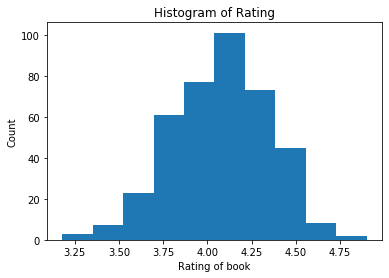

In [330]:
plt.hist(fullDf['Rating']);
plt.xlabel('Rating of book');
plt.ylabel('Count');
plt.title('Histogram of Rating');

Histogram of Rating Count and Review Count

As expected, the number of people who rate are much higher (10x) the number of people who write reviews

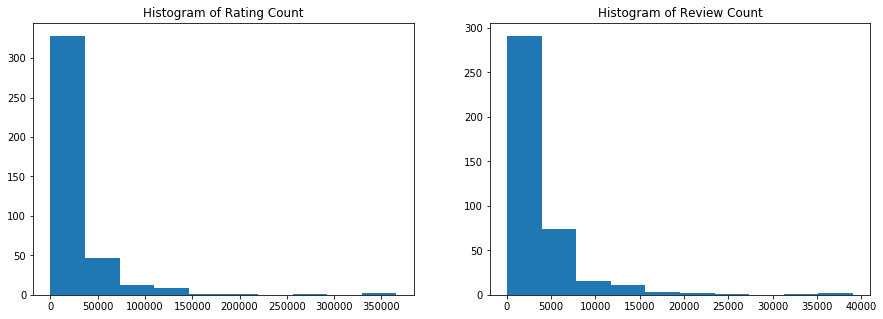

In [346]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.hist(fullDf['RatingCount']);
plt.title('Histogram of Rating Count');

plt.subplot(1, 2, 2)
plt.hist(fullDf['ReviewCount']);
plt.title('Histogram of Review Count');

plt.show()


## Key Question - 1 

1. How does the number of votes vary by category? And, for the top book in each category, how does the number of votes look?

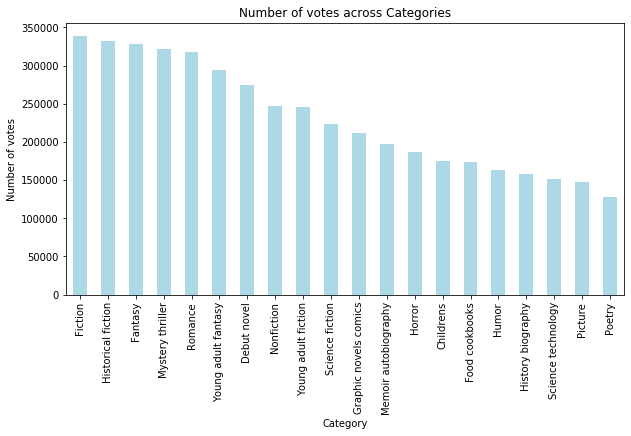

In [404]:
#Category column is not typed properly
fullDf['Category'] = fullDf.Category.str.capitalize()

#Number of votes by category
fig = plt.figure(figsize=(10,5));
byCategory = fullDf.groupby('Category')['NumberOfVotes'].sum()
byCategorySorted = byCategory.sort_values(ascending=False)
byCategorySorted.plot(kind='bar', color = 'lightblue');
plt.xlabel('Category');
plt.ylabel('Number of votes');
plt.title('Number of votes across Categories');

/Users/apoorvadshenoy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/apoorvadshenoy/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


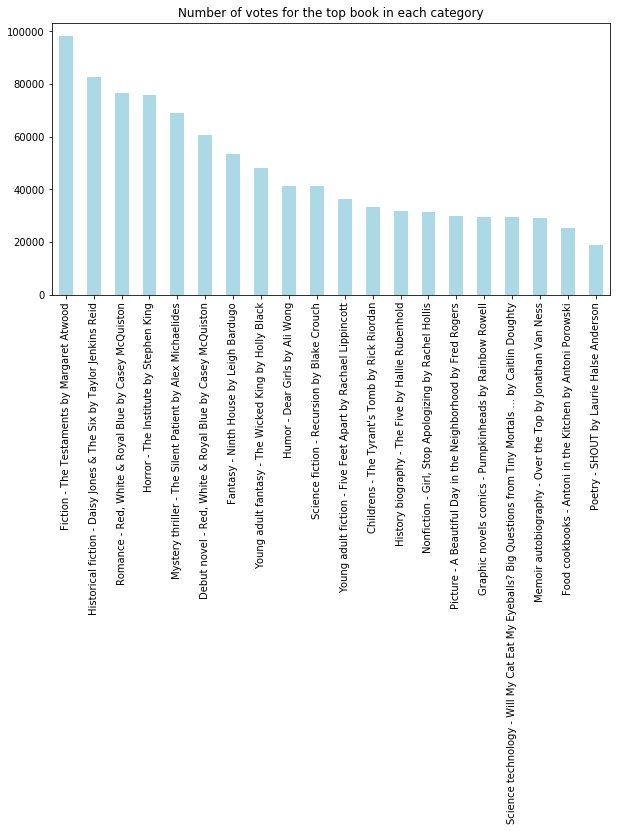

In [405]:
#Number of votes by category and topbook
topBooks = fullDf[fullDf['Position']==1]
topBooks['FullName'] = topBooks['Category'] + ' - ' + topBooks['Title'];
topBooks.drop(['Category','BookID','Hyperlink','Title','Rating','RatingCount','ReviewCount','Position'],axis=1,inplace=True)
topBooks = topBooks.sort_values(by='NumberOfVotes',ascending=False)
topBooks.plot('FullName','NumberOfVotes',kind='bar', color = 'lightblue', figsize = (10,5), legend=None);
plt.title('Number of votes for the top book in each category');
plt.xlabel('');

## Key Question - 2

2. What is the average rating of the top 20 books within each category? Which category is more popular than others? Also, looking at review count/rating count here.

As expected, the average rating is pretty high in general but History Biography tops the list and Mystery Thrillers, Fiction, Humor, and Horror are the only ones under 4.

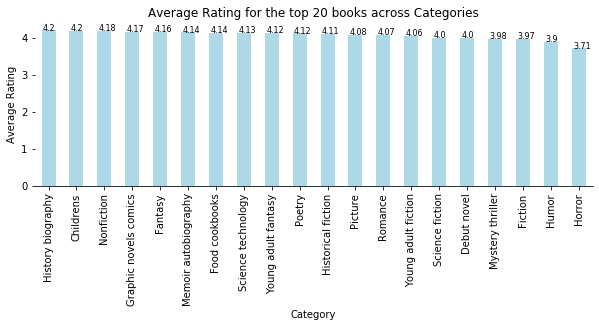

In [425]:
#Rating for top 20 books per category.
RatingbyCategory = fullDf.groupby('Category')['Rating'].mean()
RatingbyCategorySorted = RatingbyCategory.sort_values(ascending=False)
RatingbyCategorySorted.plot(kind='bar', color = 'lightblue', figsize=(10,3));
plt.xlabel('Category');
plt.ylabel('Average Rating');
plt.title('Average Rating for the top 20 books across Categories');
for i, v in enumerate(RatingbyCategorySorted):
    plt.text(i-0.2, v+0.01, str(round(v,2)), fontsize=8)

sb.despine(left = True)

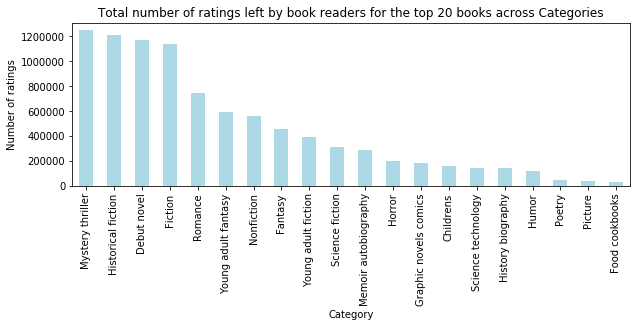

In [429]:
#Rating Count for top 20 books per category.
RatingCntbyCategory = fullDf.groupby('Category')['RatingCount'].sum()
RatingCntbyCategorySorted = RatingCntbyCategory.sort_values(ascending=False)
RatingCntbyCategorySorted.plot(kind='bar', color = 'lightblue', figsize=(10,3));
plt.xlabel('Category');
plt.ylabel('Number of ratings');
plt.title('Total number of ratings left by book readers for the top 20 books across Categories');

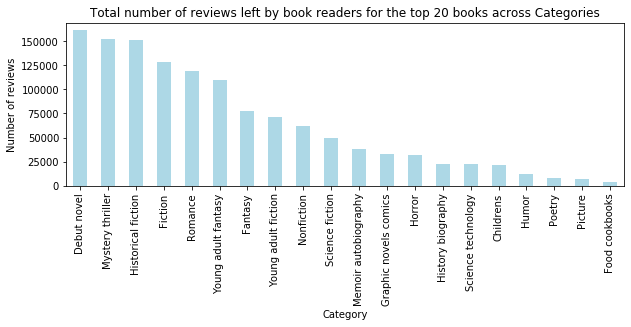

In [430]:
#Review Count for top 20 books per category.
ReviewCntbyCategory = fullDf.groupby('Category')['ReviewCount'].sum()
ReviewCntbyCategorySorted = ReviewCntbyCategory.sort_values(ascending=False)
ReviewCntbyCategorySorted.plot(kind='bar', color = 'lightblue', figsize=(10,3));
plt.xlabel('Category');
plt.ylabel('Number of reviews');
plt.title('Total number of reviews left by book readers for the top 20 books across Categories');

## Key Question - 3

3. The position of the books within each category are determined by number of votes. However, does the general rating also align with how the books are ranked?


In [447]:
fullDf['PositionAndTitle'] = fullDf['Position'].astype(str) + ' - ' + fullDf['Title']
fullDf.head()

,Category,NumberOfVotes,BookID,Hyperlink,Title,Rating,RatingCount,ReviewCount,Position,PositionAndTitle
0,Fiction,98291,42975172,https://www.goodreads.com/book/show/42975172-the-testaments,The Testaments by Margaret Atwood,4.21,167861,18041,1,1 - The Testaments by Margaret Atwood
1,Mystery thriller,68821,40097951,https://www.goodreads.com/book/show/40097951-the-silent-patient,The Silent Patient by Alex Michaelides,4.09,365819,39076,1,1 - The Silent Patient by Alex Michaelides
3,Debut novel,44936,40097951,https://www.goodreads.com/book/show/40097951-the-silent-patient,The Silent Patient by Alex Michaelides,4.09,365819,39076,2,2 - The Silent Patient by Alex Michaelides
5,Historical fiction,82483,40597810,https://www.goodreads.com/book/show/40597810-daisy-jones-the-six,Daisy Jones & The Six by Taylor Jenkins Reid,4.21,211493,32219,1,1 - Daisy Jones & The Six by Taylor Jenkins Reid
6,Fantasy,53430,43263680,https://www.goodreads.com/book/show/43263680-ninth-house,Ninth House by Leigh Bardugo,4.08,63377,11891,1,1 - Ninth House by Leigh Bardugo


In [450]:
#Trying with one category fist
fiction = fullDf[fullDf['Category'] == "Fiction"].copy()
fiction.info() #20 records

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 411
Data columns (total 10 columns):
Category            20 non-null object
NumberOfVotes       20 non-null int64
BookID              20 non-null object
Hyperlink           20 non-null object
Title               20 non-null object
Rating              20 non-null float64
RatingCount         20 non-null int64
ReviewCount         20 non-null int64
Position            20 non-null int64
PositionAndTitle    20 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 1.7+ KB


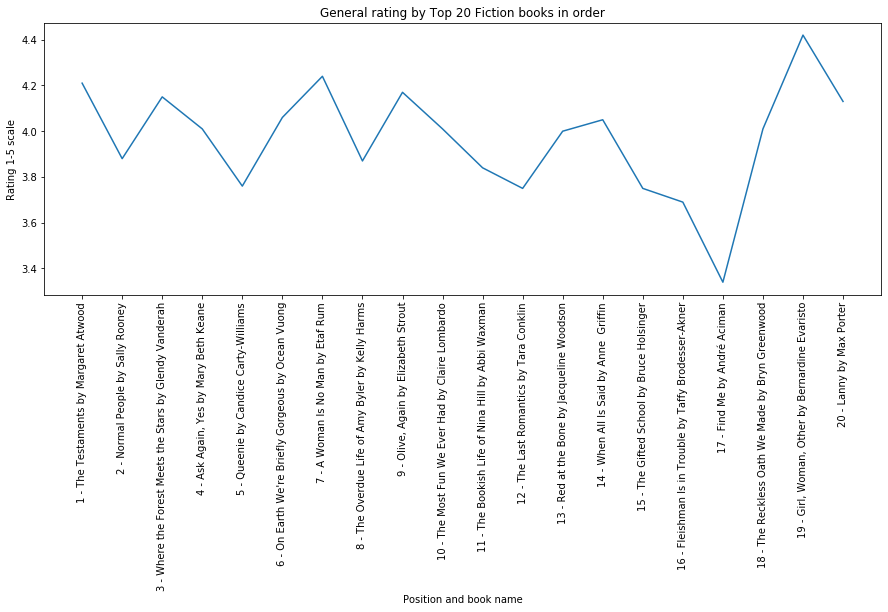

In [463]:
fig = plt.figure(figsize=(15,5))
plt.plot('PositionAndTitle','Rating',data=fiction);
plt.xticks(rotation=90);
plt.title('General rating by Top 20 Fiction books in order');
plt.xlabel('Position and book name');
plt.ylabel('Rating 1-5 scale');

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 1 to 412
Data columns (total 10 columns):
Category            20 non-null object
NumberOfVotes       20 non-null int64
BookID              20 non-null object
Hyperlink           20 non-null object
Title               20 non-null object
Rating              20 non-null float64
RatingCount         20 non-null int64
ReviewCount         20 non-null int64
Position            20 non-null int64
PositionAndTitle    20 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 1.7+ KB


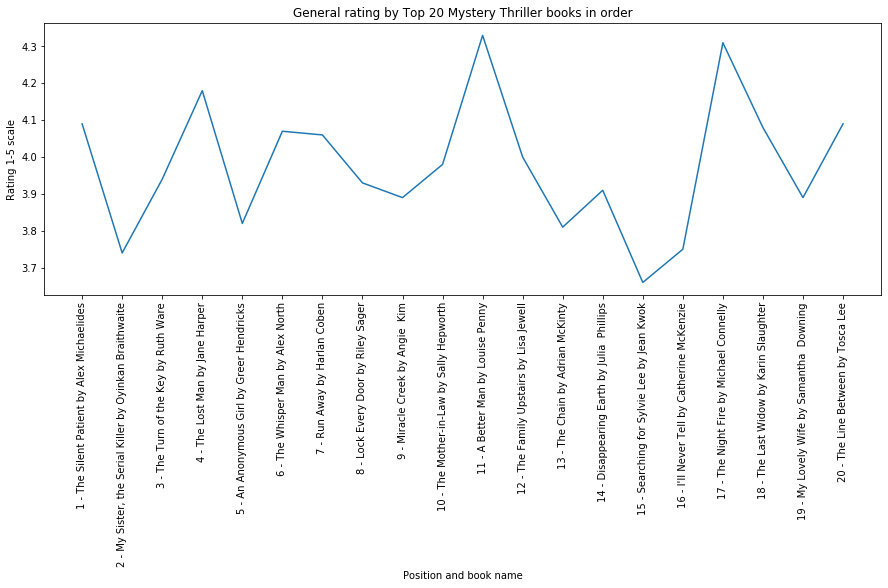

In [464]:
#curious to see one more category
thriller = fullDf[fullDf['Category'] == "Mystery thriller"].copy()
thriller.info() #20 records
fig = plt.figure(figsize=(15,5))
plt.plot('PositionAndTitle','Rating',data=thriller);
plt.xticks(rotation=90);
plt.title('General rating by Top 20 Mystery Thriller books in order');
plt.xlabel('Position and book name');
plt.ylabel('Rating 1-5 scale');

Now we can plot this for all 20 categories as subplots/facet grids!

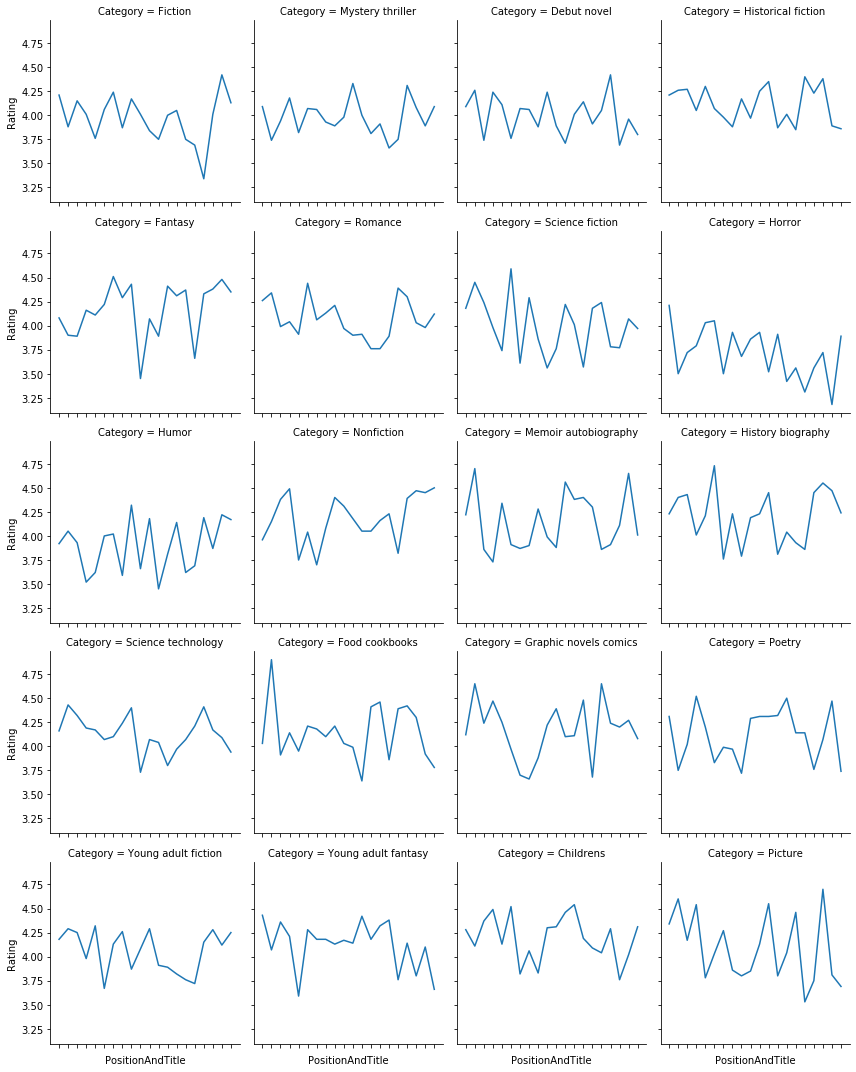

In [484]:
g = sb.FacetGrid(fullDf, col="Category", col_wrap=4);
g = g.map(plt.plot, "PositionAndTitle", "Rating");
g.set(xticklabels=[]);
g.fig.tight_layout();

## Key Question - 4

4. Does rating count/review count affect general rating?

,Category,NumberOfVotes,BookID,Hyperlink,Title,Rating,RatingCount,ReviewCount,Position
1,Mystery thriller,68821,40097951,https://www.goodreads.com/book/show/40097951-the-silent-patient,The Silent Patient by Alex Michaelides,4.09,365819,39076,1
3,Debut novel,44936,40097951,https://www.goodreads.com/book/show/40097951-the-silent-patient,The Silent Patient by Alex Michaelides,4.09,365819,39076,2


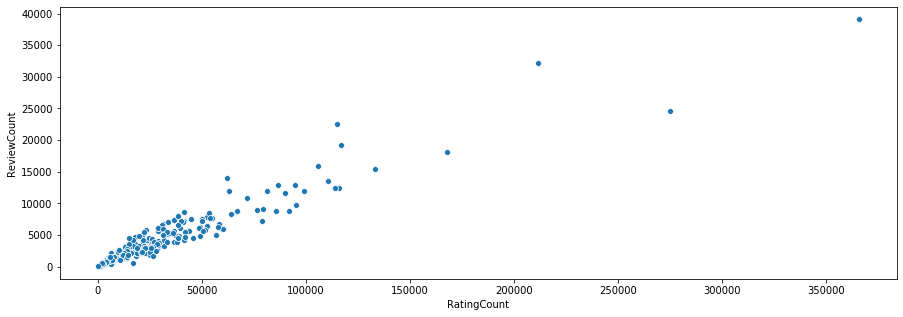

In [443]:
#Correlation between rating and review count - super linear!
fig = plt.figure(figsize=(15,5))
sb.scatterplot(x="RatingCount", y="ReviewCount", data=fullDf)

#What is that book with super high ratings/reviews? The Silent Patient by Alex Michaelides - Mystery Thriller!
fullDf[fullDf['RatingCount'] > 350000]

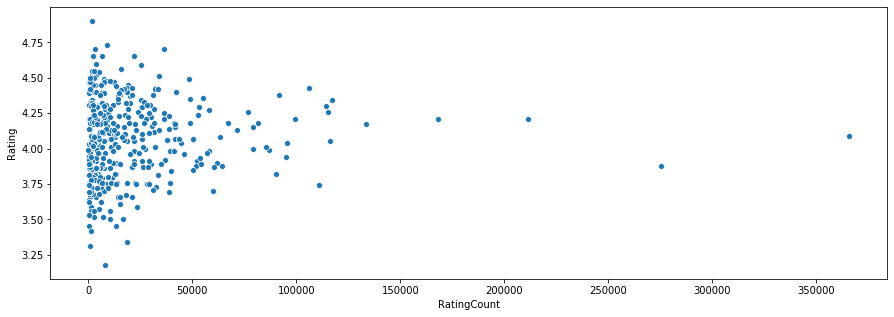

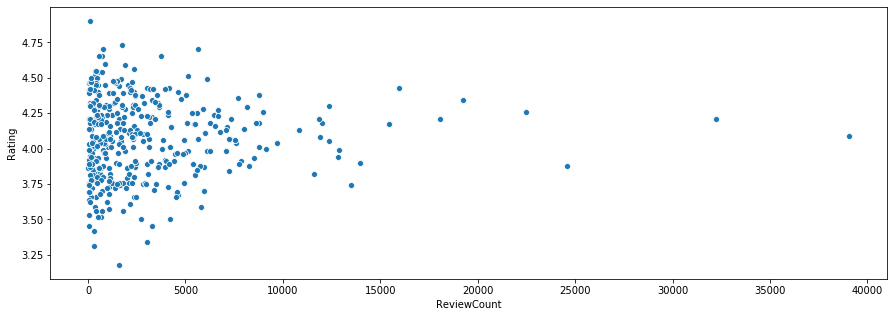

In [467]:
#Plotting rating vs rating count and review count
fig = plt.figure(figsize=(15,5))
sb.scatterplot(x="RatingCount", y="Rating", data=fullDf)

fig = plt.figure(figsize=(15,5))
sb.scatterplot(x="ReviewCount", y="Rating", data=fullDf)

# Conclusion

As seen above, using Python's BeautifulSoup, Pandas, Matplotlib, and seaborn we are able to visualize key insights about the Best of 2019 books across 20 categories from Good Reads. Some categories are definitely more popular than others (more votes, better rating, etc.) but the top books don't really have the same pattern when it comes to general rating.
